

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.









In [79]:
import numpy as np
import pandas as pd
import cv2
# from google.colab.patches import cv2_imshow # for image display
from IPython.display import display

from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [80]:
def to_uint8_image(image):
    res = (image - image.min()) * 255.0  / float(image.ptp()) + 0
    return res.astype(np.uint8)

##Step2: Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

RGB?

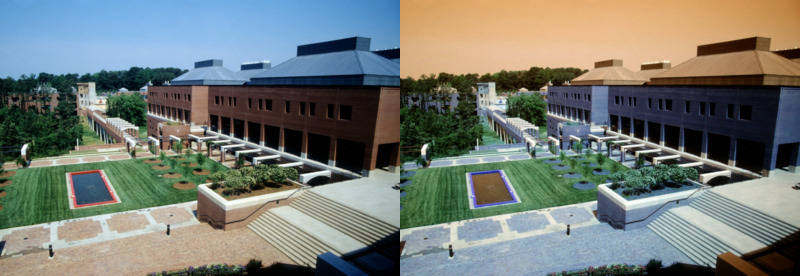

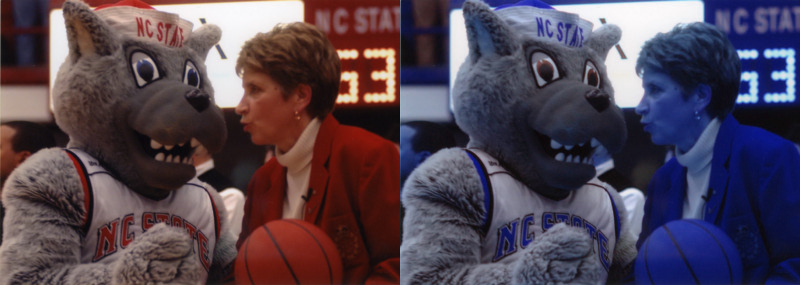

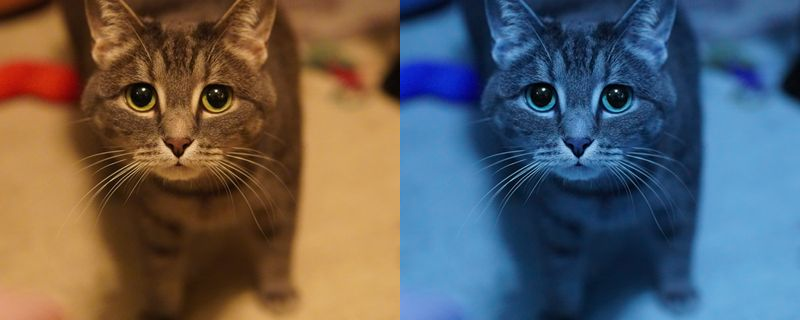

In [81]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/400,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/400,/0/default.jpg",
      "https://placecats.com/400/320"]
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url)
  image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  final_frame = cv2.hconcat((image, image_2))
  display(Image.fromarray(final_frame))
  print('\n')

#### Read an image from a URL and display it


In [86]:
# myImg.dtype

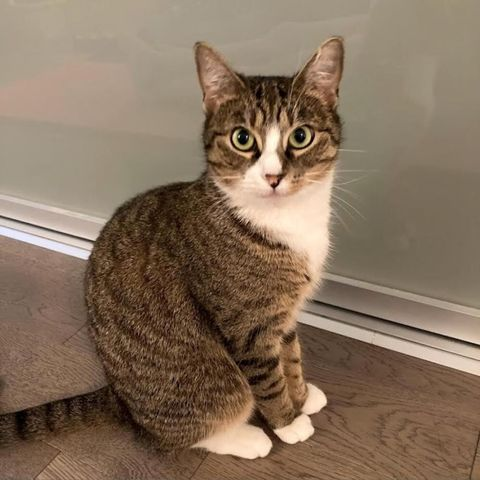

In [104]:
url = "https://placecats.com/480/480"
myImg = io.imread(url)

display(Image.fromarray(myImg[:,:,:]))

image = myImg

# b,g,r = cv2.split(image) 
# newRGBImage = cv2.merge((r,g,b))


In [89]:
myImg

array([[[175, 162, 143],
        [175, 162, 143],
        [174, 161, 142],
        ...,
        [154, 141, 122],
        [154, 141, 122],
        [154, 141, 122]],

       [[175, 162, 143],
        [175, 162, 143],
        [174, 161, 142],
        ...,
        [154, 141, 122],
        [154, 141, 122],
        [154, 141, 122]],

       [[175, 162, 143],
        [174, 161, 142],
        [174, 161, 142],
        ...,
        [154, 141, 122],
        [154, 141, 122],
        [154, 141, 122]],

       ...,

       [[117,  95,  82],
        [125, 103,  90],
        [125, 103,  90],
        ...,
        [129,  99,  71],
        [129, 100,  70],
        [132, 101,  70]],

       [[113,  94,  80],
        [112,  93,  79],
        [114,  95,  81],
        ...,
        [125,  98,  69],
        [126,  97,  67],
        [127,  98,  68]],

       [[120, 101,  87],
        [107,  88,  74],
        [107,  88,  74],
        ...,
        [121,  96,  66],
        [123,  93,  65],
        [123,  94,  64]]

In [90]:
type(myImg), myImg.max(), myImg.min(), myImg.mean(), myImg.shape

(numpy.ndarray, 255, 0, 113.34630931712962, (480, 480, 3))

In [25]:
Image.fromarray(myImg).save("./myImg.jpg")

In [91]:
myImg.shape

(480, 480, 3)

In [92]:
trImg = np.transpose(myImg, (2,0,1))
myImg.shape, trImg.shape

((480, 480, 3), (3, 480, 480))

In [94]:
trImg[0]

array([[175, 175, 174, ..., 154, 154, 154],
       [175, 175, 174, ..., 154, 154, 154],
       [175, 174, 174, ..., 154, 154, 154],
       ...,
       [117, 125, 125, ..., 129, 129, 132],
       [113, 112, 114, ..., 125, 126, 127],
       [120, 107, 107, ..., 121, 123, 123]], dtype=uint8)

In [28]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image
print(image.shape[0])
# Check the width of image
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
480
480
3


### Generate Histogram of color image and grayscale image
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.


Display the histogram of all the pixels in the color image

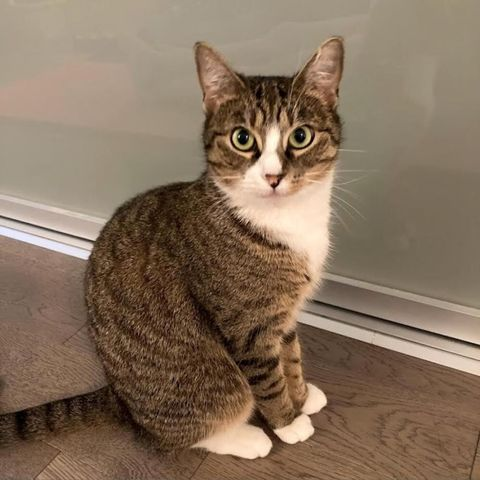

In [95]:
display(Image.fromarray(myImg[:,:,:]))
# plt.imshow(image)

In [96]:
image.ravel(), image[:,:,0].ravel().shape      # flattened array

(array([175, 162, 143, ..., 123,  94,  64], dtype=uint8), (230400,))

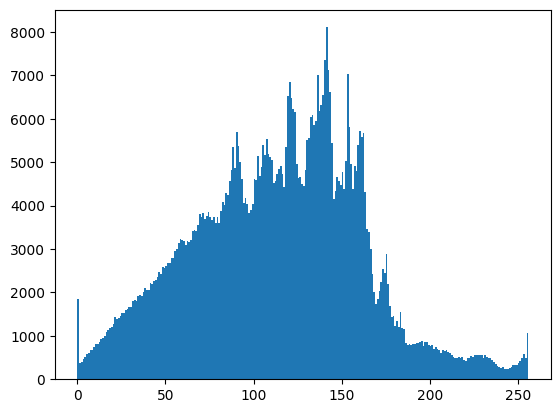

In [97]:
plt.hist(image[:,:,:].ravel(), bins = 256, range = [0,256])
plt.show()

Display the histogram of R, G, B channel
We could observe that the green channel has many pixels in 255, which represents the white patch in the image

In [98]:
cv2.imread("./111.jpg")

array([[[17,  0, 13],
        [17,  0, 13],
        [17,  0, 13],
        ...,
        [17,  6, 16],
        [17,  6, 16],
        [17,  6, 16]],

       [[17,  0, 13],
        [17,  0, 13],
        [17,  0, 13],
        ...,
        [17,  6, 16],
        [17,  6, 16],
        [17,  6, 16]],

       [[17,  0, 13],
        [17,  0, 13],
        [17,  0, 13],
        ...,
        [17,  6, 16],
        [17,  6, 16],
        [17,  6, 16]],

       ...,

       [[19,  7, 13],
        [19,  7, 13],
        [19,  7, 13],
        ...,
        [21,  4, 15],
        [21,  4, 15],
        [21,  4, 15]],

       [[20,  9, 12],
        [20,  9, 12],
        [19,  8, 11],
        ...,
        [21,  4, 15],
        [21,  4, 15],
        [21,  4, 15]],

       [[20,  9, 12],
        [20,  9, 12],
        [19,  8, 11],
        ...,
        [21,  4, 15],
        [21,  4, 15],
        [21,  4, 15]]], dtype=uint8)

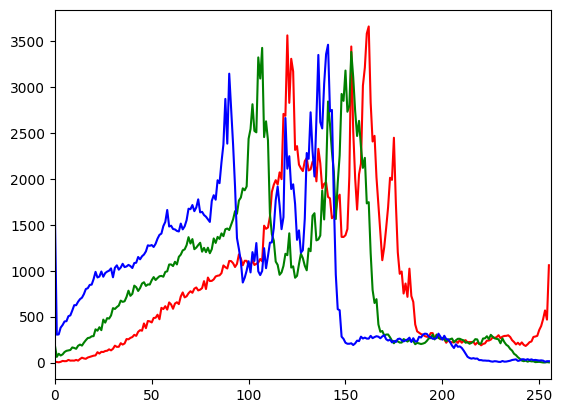

In [99]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
                                   # mask
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# cv.calcHist([img], channels, mask, bins, ranges)
#             image list
#             channel list
#             mask
#             the number of bins
#             ranges, typically [0, 255]

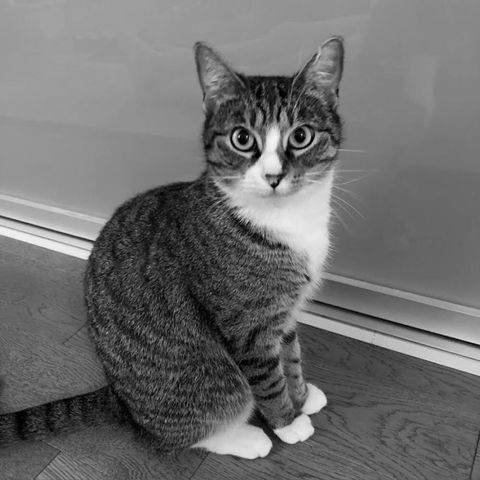

In [105]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(gray_image))


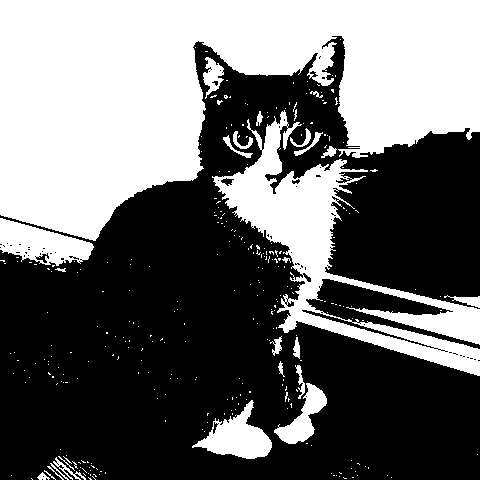

120.0

In [106]:
tr, bin_image = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY)
# _, dst = cv.threshold(src_gray, threshold_value, max_binary_value, threshold_type )
# https://docs.opencv.org/4.7.0/db/d8e/tutorial_threshold.html

display(Image.fromarray(bin_image))
tr

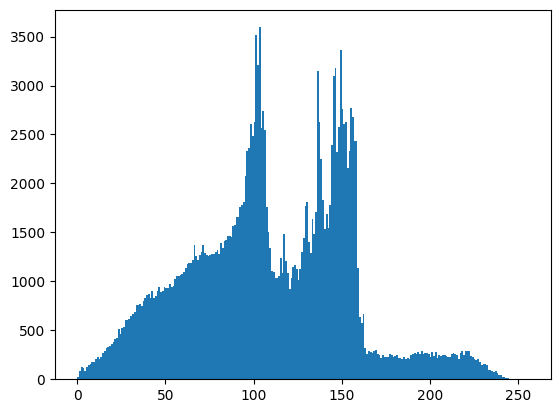

In [110]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
# plt.hist(image.ravel(), bins = 256, range = [0, 256])
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

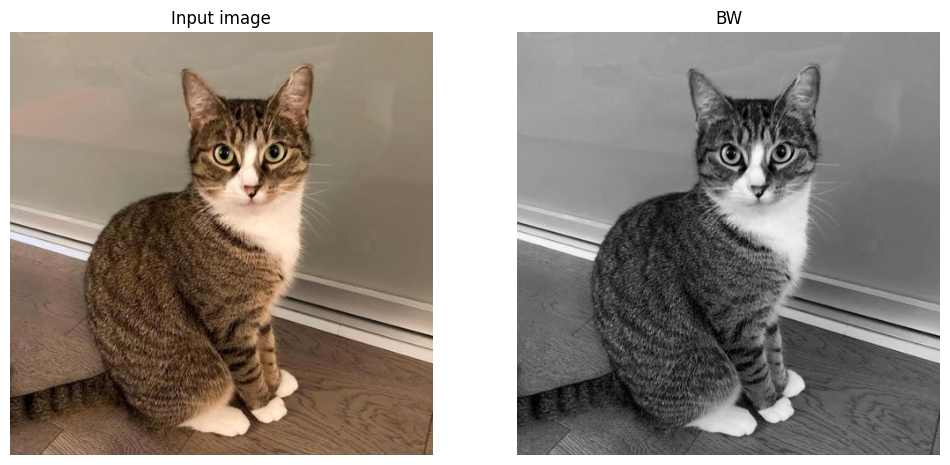

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.axis('off')
ax1.imshow(image[..., :])
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(gray_image, cmap='gray')
ax2.set_title('BW')
plt.show()

### Grayscale Transformation
This section provides some examples of conducting mathematical transformations of the grayscale image

In [111]:
anp = np.array([1,2,3])
apy = [1,2,3]
anp, apy


(array([1, 2, 3]), [1, 2, 3])

In [112]:
anp * 8, anp/2 , anp*anp

(array([ 8, 16, 24]), array([0.5, 1. , 1.5]), array([1, 4, 9]))

In [113]:
gray_image.max()

248

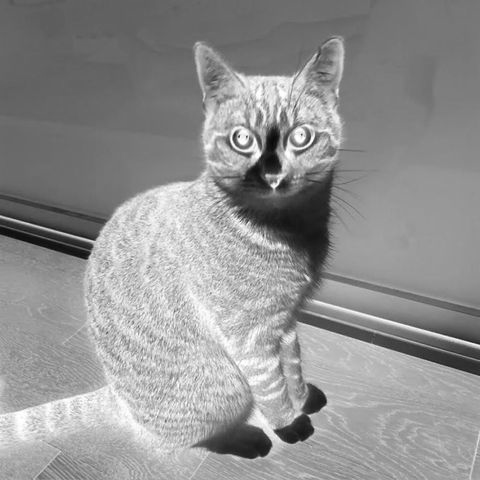

In [114]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image 
display(Image.fromarray(im2))

# cv2_imshow(im2)

## Contrasts

In [44]:
# [220, 230, 200] // 2 + 50


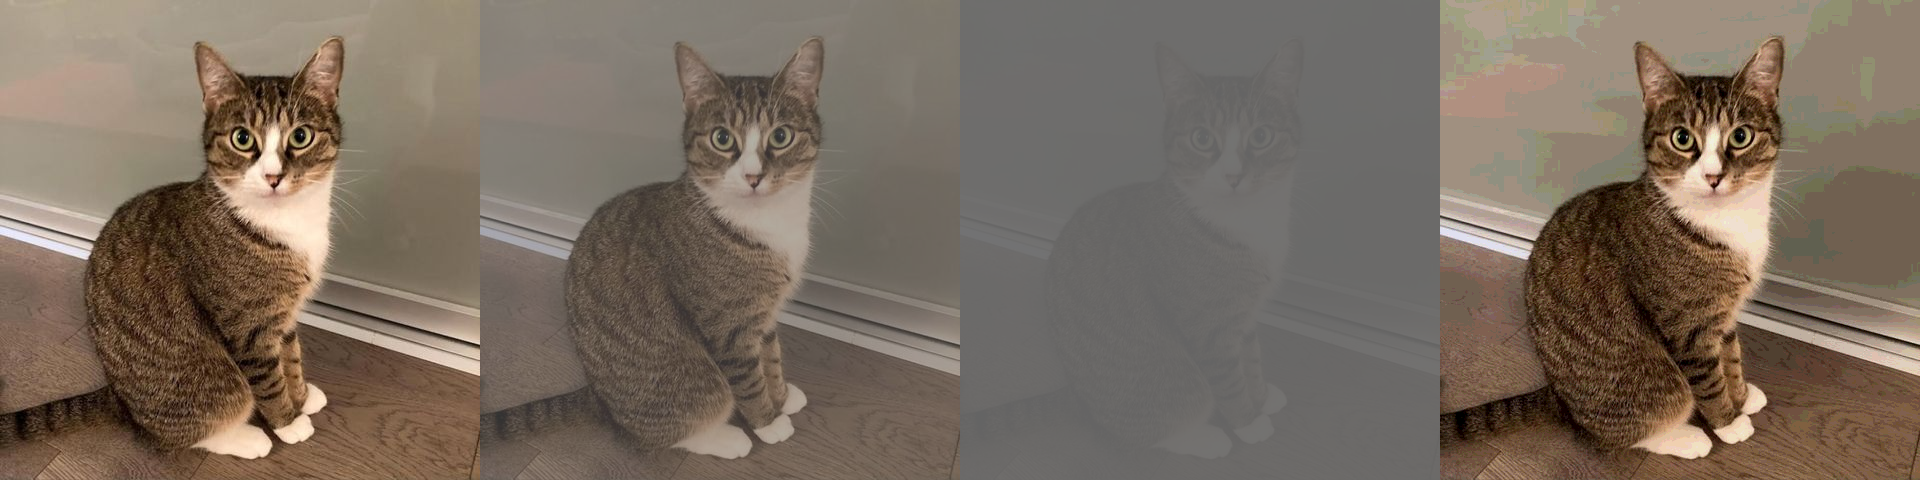

In [123]:
image2 = image // 2 + 50
image3 = image // 16 + 100
image4 = (image3 - 100) * 16
# display(Image.fromarray(image2))
image2.shape
# display(Image.fromarray(image))
display(Image.fromarray(cv2.hconcat([image, image2, image3, image4])))


In [124]:
image2.max(), image2.min(), image2.mean()

(177, 50, 106.42307725694444)

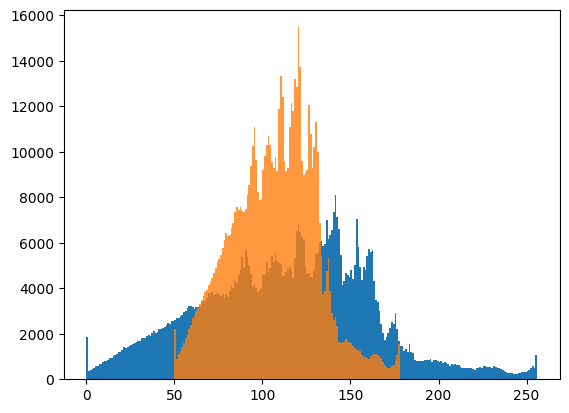

In [127]:
plt.hist(image.ravel(), bins = 256, range = [0,256] ) # , density=True)
plt.hist(image2.ravel(), bins = 256, range = [0,256], alpha = 0.8 ) 
# plt.hist(image3.ravel(), bins = 256, range = [0,256], alpha = 0.8 ) 
plt.show()

$ \Huge { C_{Mich} = \frac{a_{max} - a_{min}}{a_{max} + a_{min}} } $

Контраст Михельсона

In [128]:
amax = image2.max()
amin = image2.min()
amean = image2.mean()
h = image2.shape[0]
w = image2.shape[1]


CMich = (amax - amin) / (amax + amin)  

print(image2.shape)
print(amax, amin, amean)
print(CMich)

(480, 480, 3)
177 50 106.42307725694444
0.5594713656387665


$ \Huge { C_{g} = \frac{a_{max} - a_{min}}{P - 1 } } $

Контраст Глобальный

In [129]:
Cg = (amax - amin) / (256 - 1)
Cg

0.4980392156862745

$  \Huge { C_{rms} = \sigma_a  = \sqrt {D[a]} = \sqrt { \frac{1}{MN} \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} (a(m,n) - \bar {a})^2 } }  $

Среднеквадратичный контраст

In [307]:
Crms = ((1/(h*w)) * ((image2 - amean)**2).sum()) **0.5 
Crms

60.15091898923824

## Haralick

In [140]:
perl = io.imread("./perlin.gif")

url_noise = "./white_noise.jpg"
noise = io.imread(url_noise)

url_un = "https://gamedev.ru/files/images/wn.png"
un = io.imread(url_un)

In [176]:
im = np.zeros((200,200), np.uint8)
im = cv2.randn(im,(127),(30)) 


In [177]:
im

array([[143, 119, 187, ..., 108,  94, 152],
       [158, 123,  52, ...,  99, 171, 143],
       [183, 137, 139, ..., 170, 145, 133],
       ...,
       [164, 132, 154, ..., 142, 123,  97],
       [131, 125, 134, ..., 132, 130, 115],
       [108, 157, 141, ...,  99, 159, 118]], dtype=uint8)

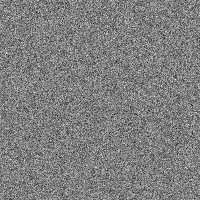

In [178]:
display(Image.fromarray(im))


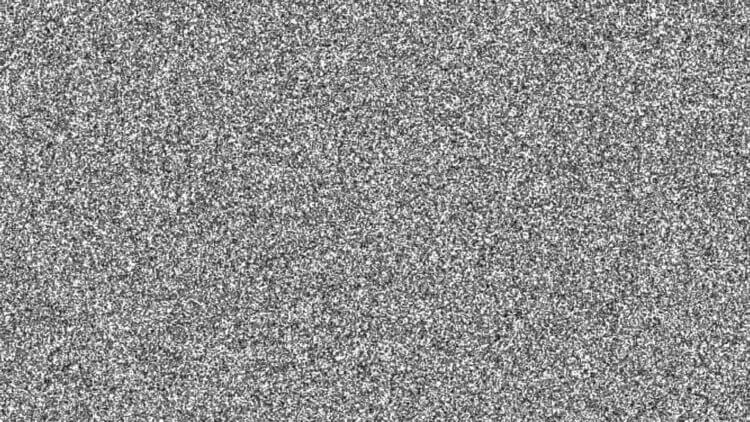

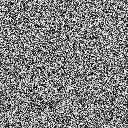

In [143]:
# display(Image.fromarray(perl))
display(Image.fromarray(noise))
display(Image.fromarray(un))


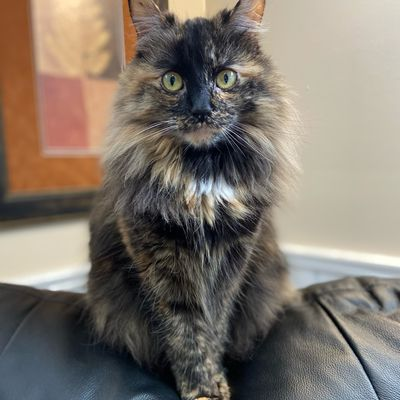

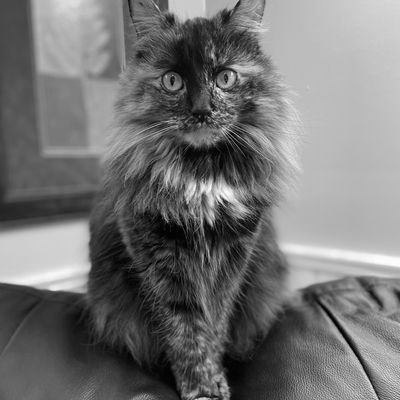

In [144]:
url = "https://placecats.com/400/400"
img = io.imread(url)

display(Image.fromarray(img[:,:,:]))

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray_image = gray_image // 2 + 50

display(Image.fromarray(gray_image))

In [55]:
# gray_image = noise

In [145]:
import matplotlib.pyplot as plt

from skimage.feature import graycomatrix, graycoprops
from skimage import data

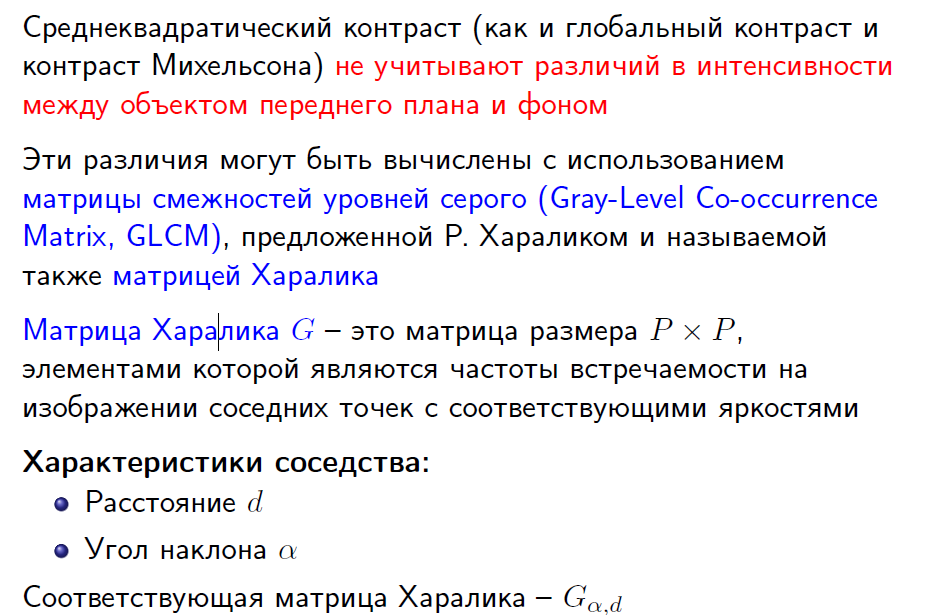

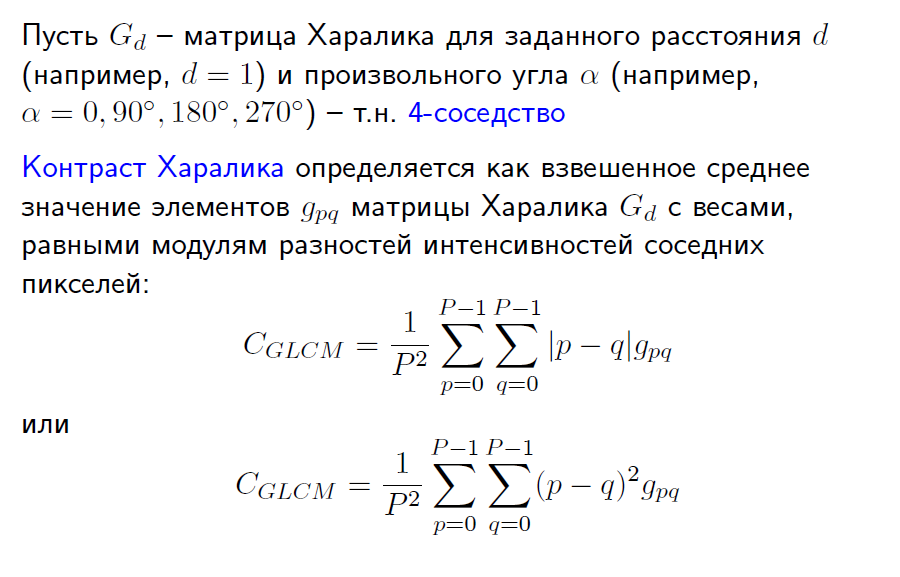

In [185]:
# gray_image = gray_image//2 + 50
glcm = graycomatrix(gray_image, distances=[1], angles=[np.pi/2], levels=256,
                    symmetric=False, normed=False)
# diss = graycoprops(glcm, 'dissimilarity')[0, 0]
# corr = graycoprops(glcm, 'correlation')[0, 0]
contr = graycoprops(glcm, "contrast")


In [192]:
contr

array([[136.13285714]])

Нормальный 1770
Котенок 45
Смещенный 900

In [187]:
glcm.shape

(256, 256, 1, 1)

In [188]:
glcm_transpose = np.transpose(glcm, (2,3,0,1))
glcm.shape, glcm_transpose.shape

((256, 256, 1, 1), (1, 1, 256, 256))

In [191]:
glcm_transpose[0][0]

array([[ 2,  2,  0, ...,  0,  0,  0],
       [ 1, 14,  6, ...,  0,  0,  0],
       [ 0,  6, 17, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)

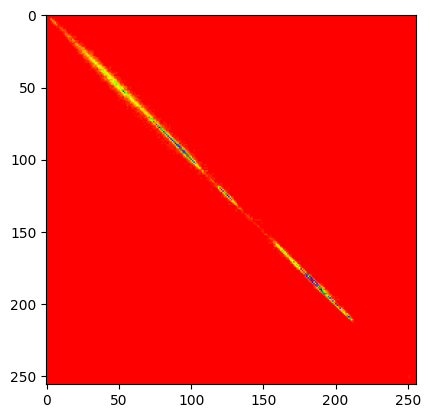

In [190]:
plt.imshow(glcm_transpose[0][0], cmap="prism")

In [196]:
glcm_transpose[0][0]

array([[ 2,  2,  0, ...,  0,  0,  0],
       [ 1, 14,  6, ...,  0,  0,  0],
       [ 0,  6, 17, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)

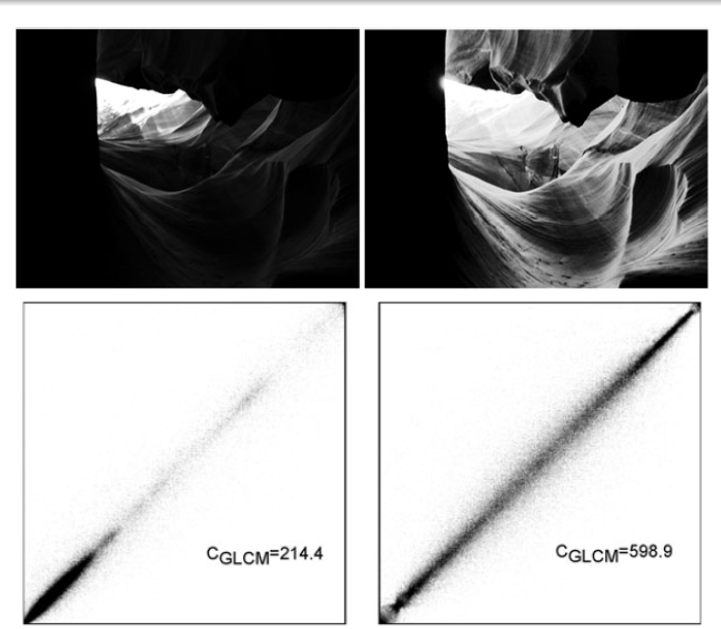

## Full-Reference Quality Metrics

- Среднеквадратическая ошибка (Mean-squared error, MSE)
- Отношение сигнал-шум (Signal-to-noise ratio, SNR)
- Индекс структурной схожести (Structural similarity (SSIM) index)

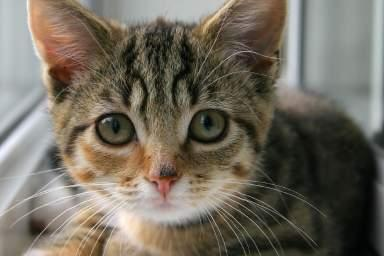

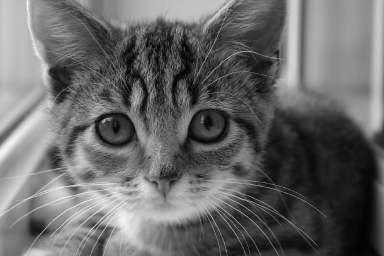

In [197]:
# url = "https://placekitten.com/500/360"
url = "./kitten384_256.jpg"
img = io.imread(url)
Image.fromarray(img).save("kitten384_256.jpg")

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

display(Image.fromarray(img[:,:,:]), Image.fromarray(gray_image))

In [198]:
mean = 0
stddev = 50
noise = np.zeros(gray_image.shape, np.uint8)
noise = cv2.randn(noise, mean, stddev)
noise = cv2.merge((noise, noise, noise))

In [199]:
noise.min(), noise.max(), noise.shape

(0, 221, (256, 384, 3))

In [200]:
noisy_img = cv2.add(img, noise)


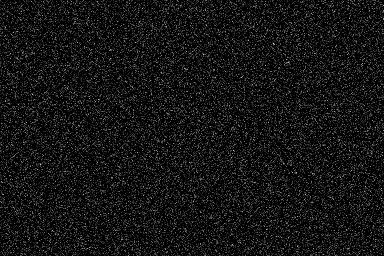

In [201]:
display(Image.fromarray(noise))

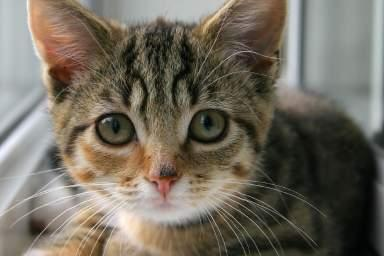

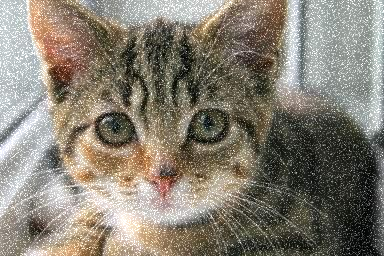

In [202]:
display(Image.fromarray(img), Image.fromarray(noisy_img))

$  \Huge { MSE =  \frac{1}{MN} \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} (a(m,n) - a_0(m,n))^2 }  $

Среднеквадратичная ошибка (MSE)

Оценка интенсивности шума $ \sigma^2 $

In [203]:
h, w, c = img.shape

In [204]:
MSE = ((noisy_img - img)**2).sum() / (h*w)
MSE

157.14608764648438

$ \Huge  { SNR = \frac{S^2}{\sigma^2} } $

В роли 𝑆 могут быть:
- Контраст $ D[a] $
- Средняя яркость изображения $\bar{a}$
- Максимально возможная яркость изображения $𝑃_{max}$
(например, 1.0, 255 или 65535) (peak SNR)

Способы оценки интенсивности шума $ \sigma^2 $:

- Как 𝑀𝑆𝐸 между исходным и референсным изображением
- Как дисперсия яркостей пикселей участков изображения, принадлежащих фону
- С использованием разностного изображения (если имеется несколько изображений одного и того же объекта)

$  \huge { SNR = 10 log_{10} \frac {D[a]}{\sigma^2}  =  10 log_{10} \frac { \frac{1}{MN} \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} (a(m,n) - \bar {a})^2 } {\sigma^2} }  $

Логарифмическое отношение сигнал-шум

In [205]:
import math
Da = ((1/(h*w)) * ((img - img.mean())**2).sum()) 
sigma2 = MSE

SNR = Da / sigma2
SNR


65.84988060997159

In [206]:
lSNR = 10 * math.log10(SNR)
lSNR

18.185549918949548

In [208]:
pSNR = 10 * math.log10(255*255 / sigma2)
pSNR

26.16776787698172

Structural Similarity Index (SSIM)

𝑆𝑆𝐼𝑀(𝑎, 𝑏) = 1 ⇔ 𝑎 = 𝑏

𝑆𝑆𝐼𝑀(𝑎, 𝑏) = 0 ⇒ отсутствие структурной схожести

𝑆𝑆𝐼𝑀(𝑎, 𝑏) < 0 ⇒ изображения имеют инвертированную структуру

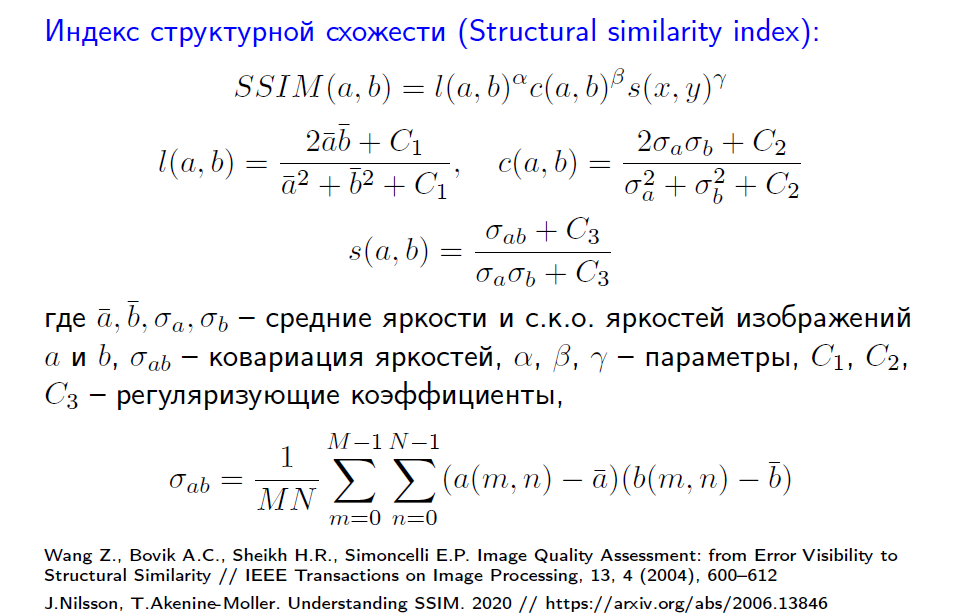

In [366]:
from skimage.metrics import structural_similarity as compare_ssim


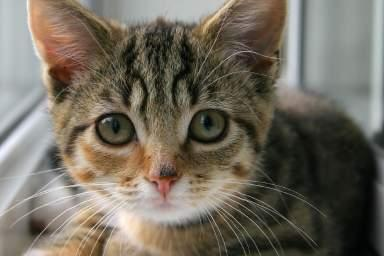

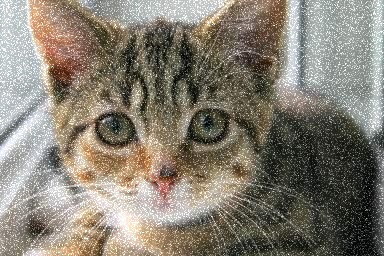

In [367]:
display(Image.fromarray(img), Image.fromarray(noisy_img))

In [368]:
grayA = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)

In [371]:
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.32748338842909974


## No-Reference Quality Metrics

https://github.com/ryanxingql/image-quality-assessment-toolbox


Виды no-reference quality metrics:
1) Natural Image Quality Evaluator (NIQE) 

https://www.geeksforgeeks.org/python-gaussian-fit/ 

http://www.scikit-video.org/stable/modules/generated/skvideo.measure.niqe.html

2) Blind/Referenceless Image Spatial Quality Evaluator
(BRISQUE) 

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

https://learnopencv.com/image-quality-assessment-brisque/

3) Perception based Image Quality Evaluator (PIQE)

https://libraries.io/pypi/pypiqe


Статистические характеристики естественных сцен (Natural scene statistics, NSS) – низкоуровневые характеристики изображения, позволяющие отличить естественные изображения от искаженных и искусственных

Виды NSS:
- Нормализованные локальные яркости (Mean subtracted contrast normalized (MSCN) coefficients)
- Коэффициенты дискретного косинусного преобразования (Discrete cosine transform (DCT) coefficients)
- Коэффициенты вейвлет-преобразования (Wavelet transform coefficients)
- ...

Известно, что MSCN-коэффициенты имеют нормальное распределение для естественных сцен

Карта MSCN:

$  \huge { MSCN(i,j) = \frac { a(i,j) - \bar {a}(i,j)  } {\sigma (i,j) + C} = \frac { I(i,j) - \mu (i,j) } {\sigma (i,j) + C} }  $


In [373]:
# pip install image-quality

In [235]:
im = cv2.imread("./kitten384_256.jpg", 0) # read as gray scale
blurred = cv2.GaussianBlur(im, (7, 7), 1.166) # apply gaussian blur to the image
blurred_sq = blurred * blurred

sigma = cv2.GaussianBlur(im * im, (7, 7), 1.166)
sigma = (sigma - blurred_sq) ** 0.5
sigma = sigma + 1.0/255 # to make sure the denominator doesn't give DivideByZero Exception

structdis = (im - blurred)/sigma # final MSCN(i, j) image

In [374]:
im = cv2.imread("./kitten384_256.jpg", 0) # read as gray scale
blurred = cv2.blur(im, (7, 7)) 
blurred_sq = blurred ** 2

sigma = cv2.blur(im * im, (7, 7))
sigma = (sigma - blurred_sq) ** 0.5
sigma = sigma + 1.0/255 # to make sure the denominator doesn't give DivideByZero Exception

structdis = (im - blurred)/sigma # final MSCN(i, j) image

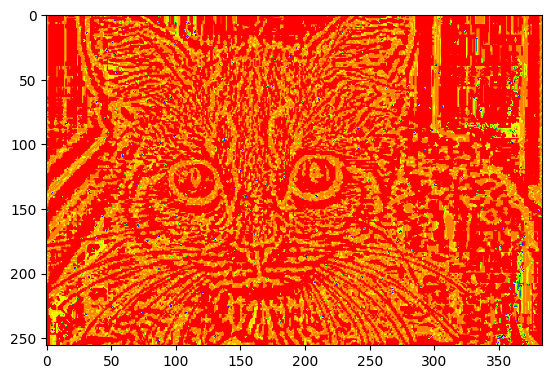

In [377]:
plt.imshow(np.sqrt(structdis), cmap="prism")

In [378]:
structdis.shape, structdis.mean()

((256, 384), 141.29424097566263)

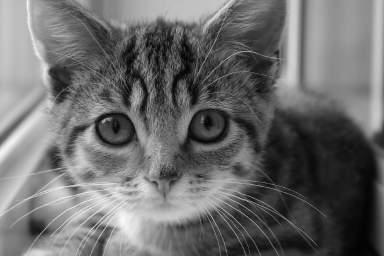

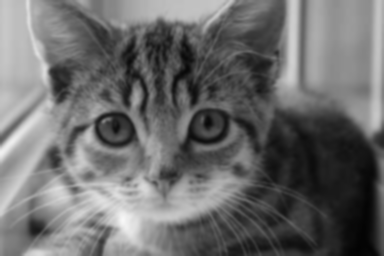

In [512]:
display(Image.fromarray(im), Image.fromarray(blurred))

In [380]:
from brisque import BRISQUE

In [386]:
obj = BRISQUE(url=False)
obj.score(img), obj.score(noisy_img)

(7.165031522213525, 58.983740201552706)